In [1]:
import os, glob, sys
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import fits
import numpy as np
from astropy.table import Table, vstack, hstack
from astropy import units as u
from astropy.coordinates import SkyCoord
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Plot presetting
import matplotlib.pyplot as plt
import matplotlib as mpl
#
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 500
plt.rc('font', family='serif')

In [3]:
plt.style.use('dark_background') # Dark 모드 스타일 적용

In [4]:
# inim = '../data/spss/LTT7987_deep/Calib-7DT01-LTT7987-20231015-022405-r-400.com.fits'
inim = '../data/spss/LTT7987_deep/Calib-7DT01-LTT7987-20231015-022405-r-400.com.fits'
data, hdr = fits.getdata(inim, header=True)
data.shape

(6388, 9576)

# Sky Sigma

In [51]:
pixscale = 0.505

ysize, xsize = data.shape
xsize/4, ysize/4

# xstep = xsize/8
# ystep = ysize/4

nx = 16
ny = 8

xstep = xsize/nx
ystep = ysize/ny

print(f"{xstep*pixscale/60:.3f} arcmin", f"{ystep*pixscale/60:.3f} arcmin")

5.037 arcmin 6.721 arcmin


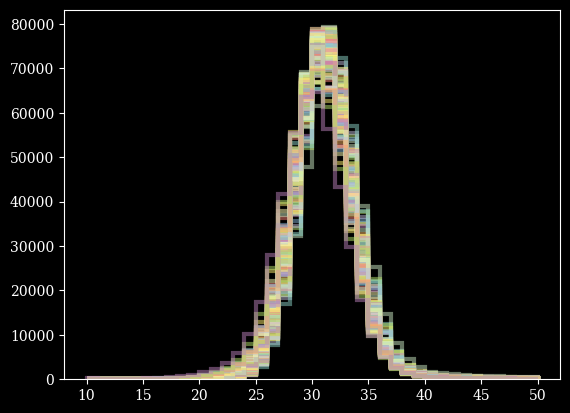

In [52]:
bins = np.arange(10, 50+1, 1)


skysig_data = np.zeros_like(data)

for xx in range(nx):
	for yy in range(ny):

		x1 = int(xstep*(xx+1))
		x0 = int(xstep*xx)
		y1 = int(ystep*(yy+1))
		y0 = int(ystep*yy)

		_data = data[y0:y1,x0:x1]
		skysig_data[y0:y1,x0:x1] = np.std(_data[(_data<50) & (_data>10)])

		plt.hist(data[y0:y1,x0:x1].flatten(), bins=bins, histtype='step', lw=3, alpha=0.5)


(array([  179.,   160.,   145.,   124.,   145.,   188.,   237.,   436.,
          666.,  1024.,  1560.,  2322.,  3571.,  5814., 10163., 17363.,
        28043., 41659., 55532., 63648., 64595., 56428., 43299., 29731.,
        17827.,  9731.,  4973.,  2475.,  1325.,   813.,   587.,   485.,
          385.,   328.,   301.,   252.,   201.,   240.,   170.,   159.]),
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
        36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
        49., 50.]),
 <BarContainer object of 40 artists>)

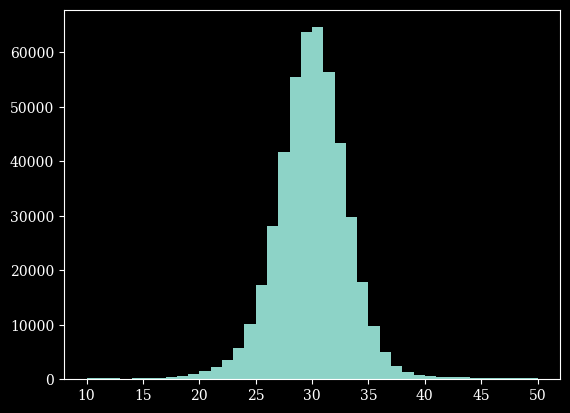

In [53]:
plt.hist(data[y0:y1,x0:x1].flatten(), bins=bins)


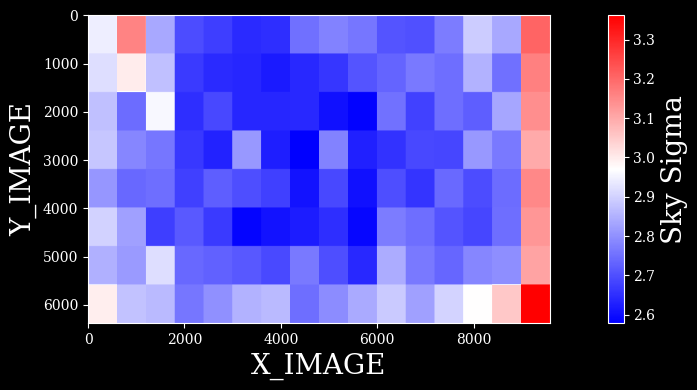

In [54]:
fig = plt.figure(figsize=(12, 4))
plt.imshow(skysig_data, cmap='bwr',)#, vmin=depth-0.2, vmax=depth+0.2)
cbar = plt.colorbar()
cbar.set_label('Sky Sigma')
plt.xlabel('X_IMAGE')
plt.ylabel('Y_IMAGE')
plt.tight_layout()